# EDF มีไรบ้าง

In [1]:
import os
import pyedflib
from pathlib import Path

# กำหนด path ของโฟลเดอร์
folder_path = r"C:\V89\data2"

# หาไฟล์ EDF ทั้งหมดในโฟลเดอร์
edf_files = [f for f in os.listdir(folder_path) if f.endswith('.edf')]

print(f"พบไฟล์ EDF จำนวน {len(edf_files)} ไฟล์:")
for i, file_name in enumerate(edf_files, 1):
    file_path = os.path.join(folder_path, file_name)
    try:
        # เปิดไฟล์ EDF
        f = pyedflib.EdfReader(file_path)
        # ดึงข้อมูลพื้นฐาน
        print(f"\nไฟล์ที่ {i}: {file_name}")
        print("Patient ID:", f.getPatientCode())
        print("Recording ID:", f.getAdmincode())
        print("Start Date:", f.getStartdatetime())
        print("Number of Signals:", f.signals_in_file)
        print("Signal Labels:", f.getSignalLabels())
        print("Duration (seconds):", f.getFileDuration())
        f.close()
    except Exception as e:
        print(f"ไม่สามารถอ่านไฟล์ {file_name}: {e}")

พบไฟล์ EDF จำนวน 24 ไฟล์:

ไฟล์ที่ 1: 00000995-100507[001].edf
Patient ID: 
Recording ID: 
Start Date: 2019-04-17 22:35:00
Number of Signals: 20
Signal Labels: ['EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Body', 'PulseRate', 'Mic', 'Tracheal']
Duration (seconds): 3600.0

ไฟล์ที่ 2: 00000995-100507[002].edf
Patient ID: 
Recording ID: 
Start Date: 2019-04-17 23:35:00
Number of Signals: 20
Signal Labels: ['EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Body', 'PulseRate', 'Mic', 'Tracheal']
Duration (seconds): 3600.0

ไฟล์ที่ 3: 00000995-100507[003].edf
Patient ID: 
Recording ID: 
Start Date: 2019-04-18 00:35:00
Number of Signals: 20
Signal Labels: ['EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EOG LOC-A2', 'EOG

เปิดไฟล์สำเร็จ: C:\V89\data2\00000995-100507[001].edf
=== Header Information ===
Patient ID: 
Recording ID: 
Start Date: 2019-04-17 22:35:00
Number of Signals: 20
Signal Labels: ['EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Body', 'PulseRate', 'Mic', 'Tracheal']
Duration (seconds): 3600.0
พบช่องสัญญาณ: Snore ที่ index 10
พบช่องสัญญาณ: Mic ที่ index 18
พบช่องสัญญาณ: Tracheal ที่ index 19


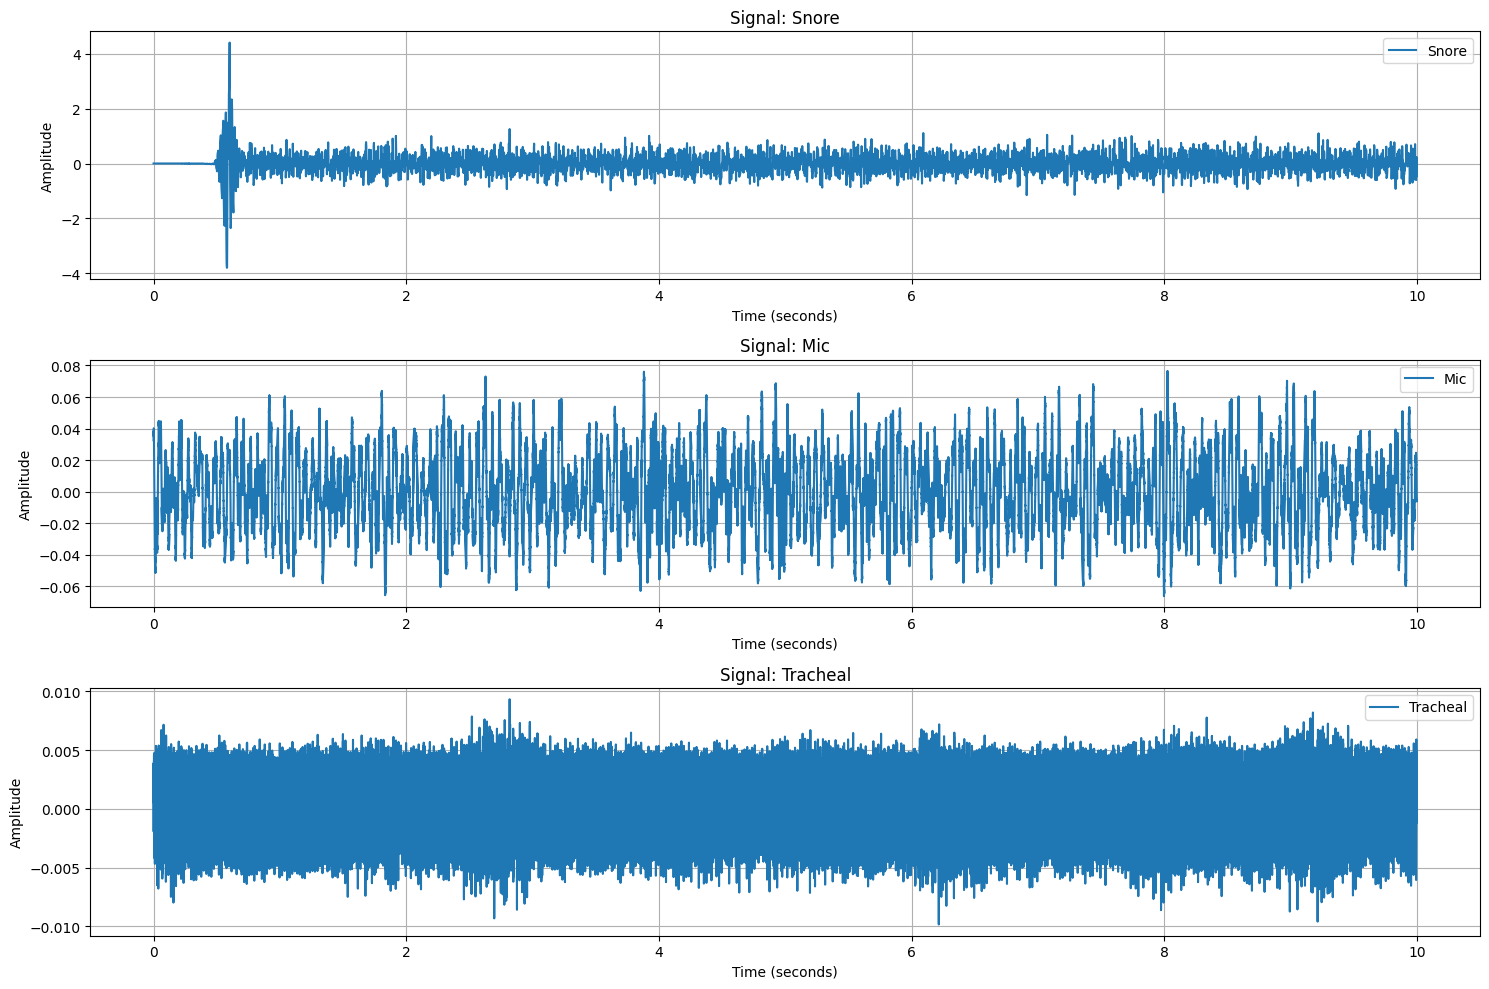

In [2]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

# กำหนด path ของไฟล์ EDF
file_path = r"C:\V89\data2\00000995-100507[001].edf"

# เปิดไฟล์ EDF
try:
    f = pyedflib.EdfReader(file_path)
    print("เปิดไฟล์สำเร็จ:", file_path)
except Exception as e:
    print("ไม่สามารถเปิดไฟล์ได้:", e)
    raise

# ดึงข้อมูลส่วนหัว
print("=== Header Information ===")
print("Patient ID:", f.getPatientCode())
print("Recording ID:", f.getAdmincode())
print("Start Date:", f.getStartdatetime())
print("Number of Signals:", f.signals_in_file)
print("Signal Labels:", f.getSignalLabels())
print("Duration (seconds):", f.getFileDuration())

# หาดัชนี (index) ของช่อง Snore, Mic, และ Tracheal
signal_labels = f.getSignalLabels()
signal_indices = {
    'Snore': signal_labels.index('Snore') if 'Snore' in signal_labels else None,
    'Mic': signal_labels.index('Mic') if 'Mic' in signal_labels else None,
    'Tracheal': signal_labels.index('Tracheal') if 'Tracheal' in signal_labels else None
}

# ตรวจสอบว่าพบช่องสัญญาณหรือไม่
for signal_name, index in signal_indices.items():
    if index is None:
        print(f"ไม่พบช่องสัญญาณ: {signal_name}")
    else:
        print(f"พบช่องสัญญาณ: {signal_name} ที่ index {index}")

# อ่านและพล็อตสัญญาณจาก Snore, Mic, และ Tracheal
plt.figure(figsize=(15, 10))
for signal_name, index in signal_indices.items():
    if index is not None:
        # อ่านข้อมูลสัญญาณ
        signal = f.readSignal(index)
        # สร้างแกนเวลา (สมมติว่าความถี่ตัวอย่างคงที่)
        sampling_rate = f.getSampleFrequency(index)
        time = np.arange(len(signal)) / sampling_rate
        # จำกัดข้อมูล 10 วินาทีแรกเพื่อให้ดูง่าย
        max_samples = int(10 * sampling_rate)  # 10 วินาที
        # พล็อตกราฟ
        plt.subplot(3, 1, list(signal_indices.keys()).index(signal_name) + 1)
        plt.plot(time[:max_samples], signal[:max_samples], label=signal_name)
        plt.title(f"Signal: {signal_name}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

# ปิดไฟล์
f.close()

# ฟังเสียงกรน

เปิดไฟล์สำเร็จ: C:\V89\data2\00000995-100507[001].edf
Signal Labels: ['EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Body', 'PulseRate', 'Mic', 'Tracheal']
พบช่องสัญญาณ: Snore ที่ index 10
พบช่องสัญญาณ: Mic ที่ index 18
พบช่องสัญญาณ: Tracheal ที่ index 19


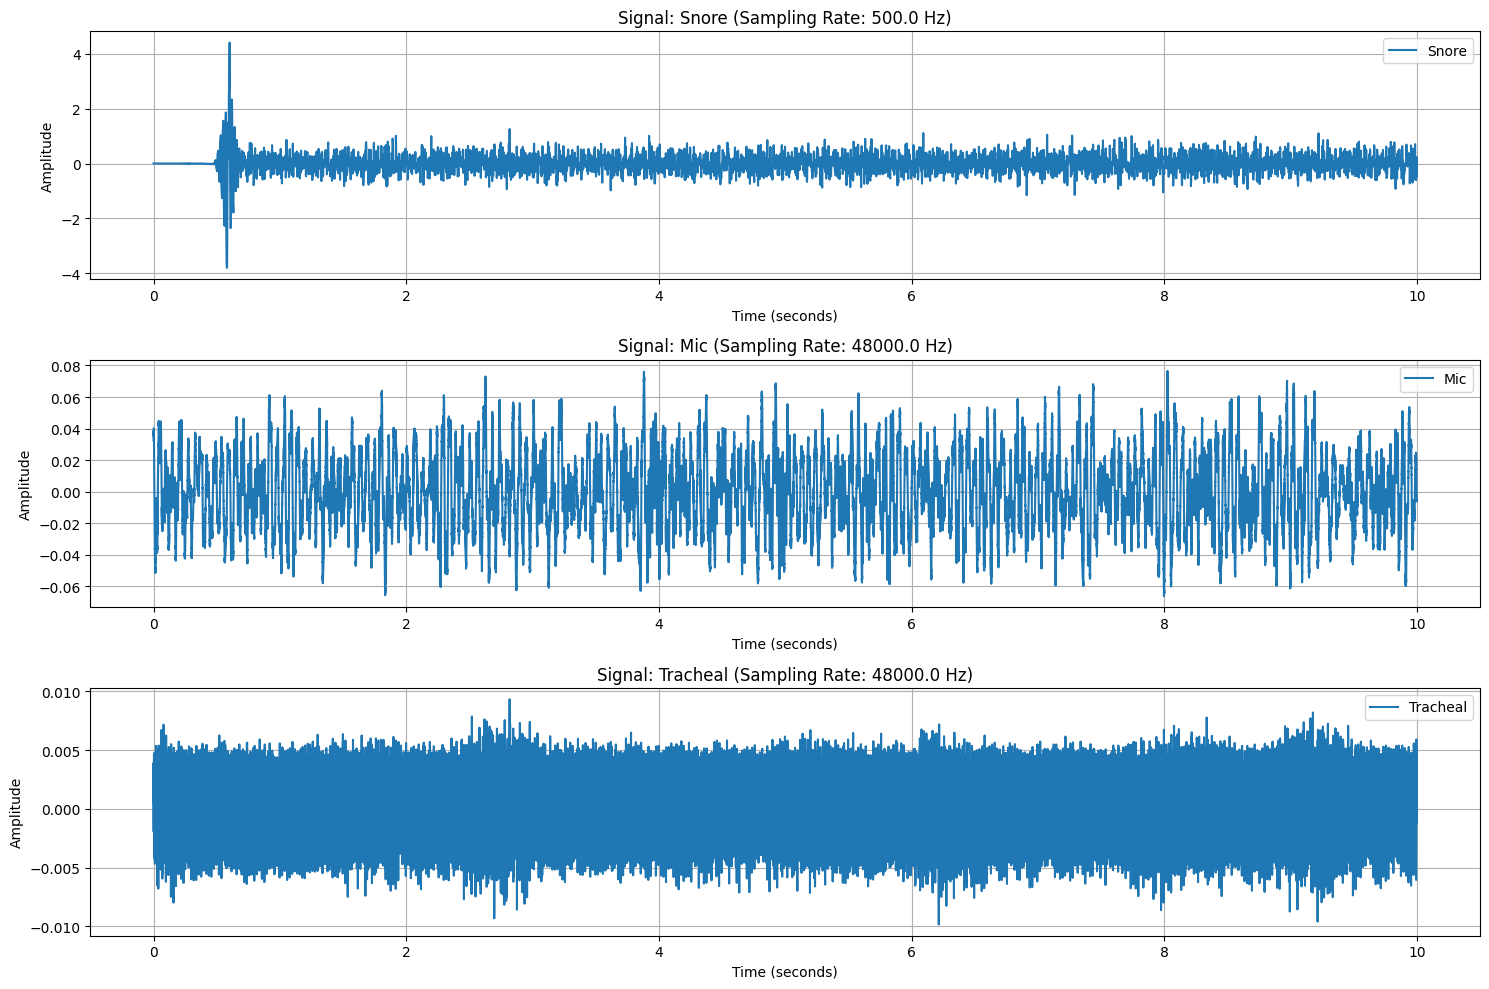


เล่นเสียงจาก: Snore (Sampling Rate: 500.0 Hz)
Sampling rate ของ Snore (500.0 Hz) ต่ำเกินไปสำหรับเล่นเสียง
ลองดูสัญญาณในกราฟแทน หรือประมวลผลสัญญาณเพิ่มเติม

เล่นเสียงจาก: Mic (Sampling Rate: 48000.0 Hz)



เล่นเสียงจาก: Tracheal (Sampling Rate: 48000.0 Hz)


In [1]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import scipy.signal

# กำหนด path ของไฟล์ EDF
file_path = r"C:\V89\data2\00000995-100507[001].edf"

# เปิดไฟล์ EDF
try:
    f = pyedflib.EdfReader(file_path)
    print("เปิดไฟล์สำเร็จ:", file_path)
except Exception as e:
    print("ไม่สามารถเปิดไฟล์ได้:", e)
    raise

# ดึงข้อมูลส่วนหัว
signal_labels = f.getSignalLabels()
print("Signal Labels:", signal_labels)

# หาดัชนีของช่อง Snore, Mic, และ Tracheal
signal_indices = {
    'Snore': signal_labels.index('Snore') if 'Snore' in signal_labels else None,
    'Mic': signal_labels.index('Mic') if 'Mic' in signal_labels else None,
    'Tracheal': signal_labels.index('Tracheal') if 'Tracheal' in signal_labels else None
}

# ตรวจสอบว่าพบช่องสัญญาณหรือไม่
for signal_name, index in signal_indices.items():
    if index is None:
        print(f"ไม่พบช่องสัญญาณ: {signal_name}")
    else:
        print(f"พบช่องสัญญาณ: {signal_name} ที่ index {index}")

# อ่านและพล็อตสัญญาณ
plt.figure(figsize=(15, 10))
signals_data = {}
sampling_rates = {}

for signal_name, index in signal_indices.items():
    if index is not None:
        # อ่านข้อมูลสัญญาณ
        signal = f.readSignal(index)
        sampling_rate = f.getSampleFrequency(index)
        signals_data[signal_name] = signal
        sampling_rates[signal_name] = sampling_rate
        # สร้างแกนเวลา (10 วินาทีแรก)
        max_samples = int(10 * sampling_rate)
        time = np.arange(len(signal)) / sampling_rate
        # พล็อตกราฟ
        plt.subplot(3, 1, list(signal_indices.keys()).index(signal_name) + 1)
        plt.plot(time[:max_samples], signal[:max_samples], label=signal_name)
        plt.title(f"Signal: {signal_name} (Sampling Rate: {sampling_rate} Hz)")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()

# เล่นเสียงจากช่อง Mic (และลอง Snore, Tracheal ถ้าเหมาะสม)
for signal_name, index in signal_indices.items():
    if index is not None:
        sampling_rate = sampling_rates[signal_name]
        signal = signals_data[signal_name]
        max_samples = int(10 * sampling_rate)  # 10 วินาที
        print(f"\nเล่นเสียงจาก: {signal_name} (Sampling Rate: {sampling_rate} Hz)")
        if sampling_rate >= 8000:  # ตรวจสอบว่า sampling rate เหมาะสำหรับเสียงหรือไม่
            display(Audio(signal[:max_samples], rate=sampling_rate))
        else:
            print(f"Sampling rate ของ {signal_name} ({sampling_rate} Hz) ต่ำเกินไปสำหรับเล่นเสียง")
            print("ลองดูสัญญาณในกราฟแทน หรือประมวลผลสัญญาณเพิ่มเติม")

# ปิดไฟล์
f.close()

# Open Sound with Selected Annotations

ตัวอย่างข้อมูลใน CSV (5 แถวแรก):
   patient_id  event_id       family              type  start_sec  \
0         999        20  Respiratory  ObstructiveApnea      155.0   
1         999        33  Respiratory  ObstructiveApnea      209.0   
2         999        39  Respiratory  ObstructiveApnea      264.5   
3         999        44  Respiratory  ObstructiveApnea      295.5   
4         999        49  Respiratory  ObstructiveApnea      347.0   

   duration_sec  end_sec  segment_index  segment_local_start_sec  \
0          17.0    172.0              0                    155.0   
1          19.0    228.0              0                    209.0   
2          14.0    278.5              0                    264.5   
3          12.5    308.0              0                    295.5   
4          11.5    358.5              0                    347.0   

   recording_start_iso  
0  2019-04-19T08:43:41  
1  2019-04-19T08:43:41  
2  2019-04-19T08:43:41  
3  2019-04-19T08:43:41  
4  2019-04-19T08:4

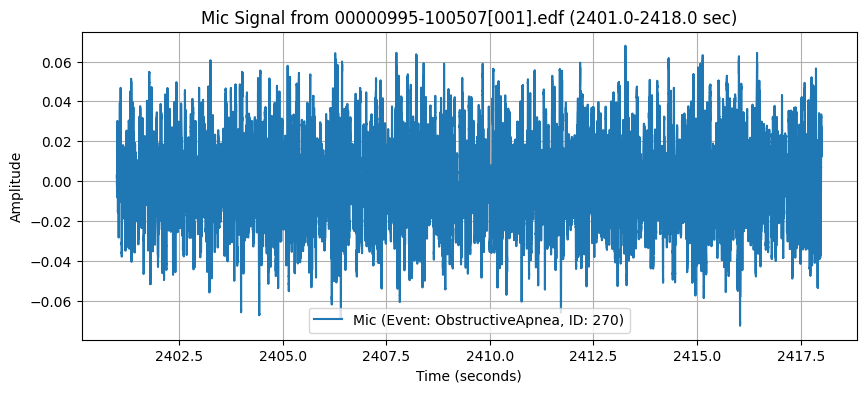


เล่นเสียงจาก Mic (Sampling Rate: 48000.0 Hz, Event: ObstructiveApnea)


In [1]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

# กำหนด path
csv_path = r"C:\V89\Snore_Apnea_Analyze\EDF_RML\data_csv\respiratory_plus_normal.csv"
edf_path = r"C:\V89\data2\00000995-100507[001].edf"  # สมมติว่าใช้ไฟล์นี้

# อ่านไฟล์ CSV
try:
    df = pd.read_csv(csv_path)
    print("ตัวอย่างข้อมูลใน CSV (5 แถวแรก):")
    print(df.head())
except Exception as e:
    print("ไม่สามารถอ่านไฟล์ CSV ได้:", e)
    raise

# สุ่มเลือก 1 แถวจาก CSV
random_row = df.sample(n=1).iloc[0]
print("\nช่วงที่สุ่มเลือก:")
print(random_row)

# ดึงข้อมูลจากแถว
start_sec = random_row['start_sec']
end_sec = random_row['end_sec']
event_type = random_row['type']
event_id = random_row['event_id']
patient_id = random_row['patient_id']

# ตรวจสอบว่าไฟล์ EDF มีอยู่
if not os.path.exists(edf_path):
    print(f"ไม่พบไฟล์ EDF: {edf_path}")
    raise FileNotFoundError

# เปิดไฟล์ EDF
try:
    f = pyedflib.EdfReader(edf_path)
    print(f"\nเปิดไฟล์ EDF สำเร็จ: {edf_path}")
    print("Header Info:", f.getHeader())
    print("Duration (seconds):", f.getFileDuration())
except Exception as e:
    print(f"ไม่สามารถเปิดไฟล์ EDF ได้: {e}")
    raise

# หาดัชนีของช่อง Mic
signal_labels = f.getSignalLabels()
mic_index = signal_labels.index('Mic') if 'Mic' in signal_labels else None
if mic_index is None:
    print("ไม่พบช่อง Mic ในไฟล์ EDF")
    f.close()
    raise ValueError

# อ่านสัญญาณ Mic
sampling_rate = f.getSampleFrequency(mic_index)
signal = f.readSignal(mic_index)
signal_length = len(signal)
signal_duration = signal_length / sampling_rate
print(f"Sampling Rate of Mic: {sampling_rate} Hz")
print(f"Signal Length: {signal_length} samples")
print(f"Signal Duration: {signal_duration} seconds")

# คำนวณตัวอย่าง (samples) จาก start_sec และ end_sec
start_sample = int(start_sec * sampling_rate)
end_sample = int(end_sec * sampling_rate)

# ตรวจสอบขอบเขต
if start_sample >= signal_length:
    print(f"ข้อผิดพลาด: start_sample ({start_sample}) เกินความยาวสัญญาณ ({signal_length})")
    f.close()
    raise ValueError("ช่วงที่เลือกอยู่นอกขอบเขตสัญญาณ")
if end_sample > signal_length:
    print(f"ปรับ end_sample จาก {end_sample} เป็น {signal_length} เพราะเกินความยาวสัญญาณ")
    end_sample = signal_length
if start_sample >= end_sample:
    print(f"ข้อผิดพลาด: start_sample ({start_sample}) >= end_sample ({end_sample})")
    f.close()
    raise ValueError("ช่วงที่เลือกไม่ถูกต้อง")

# ดึงสัญญาณในช่วงที่เลือก
audio_segment = signal[start_sample:end_sample]
time_segment = np.arange(start_sample, end_sample) / sampling_rate

# ตรวจสอบว่า audio_segment ไม่ว่าง
if len(audio_segment) == 0:
    print("ข้อผิดพลาด: audio_segment เป็น array ว่าง")
    f.close()
    raise ValueError("ไม่สามารถดึงสัญญาณในช่วงที่เลือกได้")

# พล็อตกราฟสัญญาณ
plt.figure(figsize=(10, 4))
plt.plot(time_segment, audio_segment, label=f'Mic (Event: {event_type}, ID: {event_id})')
plt.title(f"Mic Signal from {os.path.basename(edf_path)} ({start_sec}-{end_sec} sec)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# เล่นเสียงจาก Mic
print(f"\nเล่นเสียงจาก Mic (Sampling Rate: {sampling_rate} Hz, Event: {event_type})")
if sampling_rate >= 8000:
    display(Audio(audio_segment, rate=sampling_rate))
else:
    print(f"Sampling rate ({sampling_rate} Hz) ต่ำเกินไปสำหรับเล่นเสียง")
    print("กำลังลอง upsample สัญญาณ...")
    from scipy.signal import resample
    target_rate = 8000
    num_samples = int(len(audio_segment) * target_rate / sampling_rate)
    if num_samples > 0:
        upsampled_signal = resample(audio_segment, num_samples)
        display(Audio(upsampled_signal, rate=target_rate))
    else:
        print("ไม่สามารถ upsample ได้: audio_segment ว่าง")

# ปิดไฟล์ EDF
f.close()